In [57]:
import networkx as nx
import osmnx as ox
from random import choices

%matplotlib inline
ox.__version__

'1.3.0'

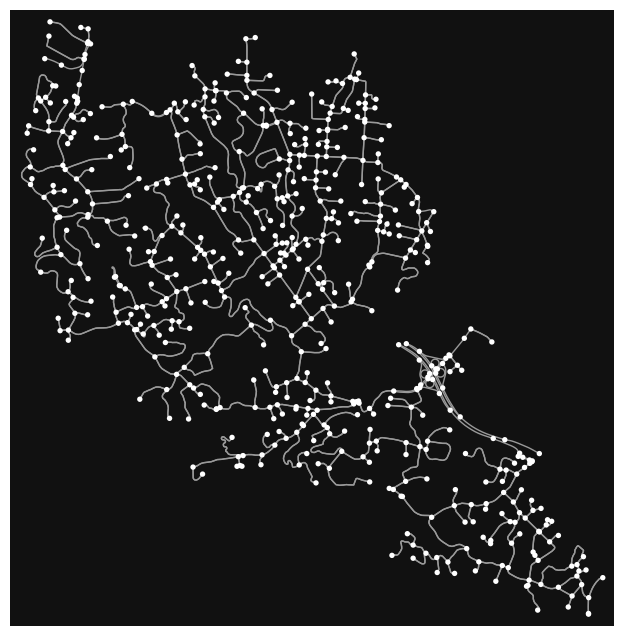

In [3]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place(
    {'city': 'Los Altos Hills', 'state': 'California'}, network_type="drive")
fig, ax = ox.plot_graph(G)

In [4]:
def get_distance(graph, start_node, end_node):
    start_node = graph[start_node]

    edge = start_node.get(end_node)

    if edge is None:
        return 0

    return edge[0]['length']

def BFS(graph, first_node, target_node):
    next_nodes = [first_node]
    visited = {}
    length = 0

    visited[first_node] = [None, 0]

    while len(next_nodes) > 0:
        cur_node = next_nodes.pop(0)

        if cur_node == target_node:
            print("Found target")
            break

        for node in iter(graph[cur_node]):
            if (visited.__contains__(node)):
                continue
            
            next_nodes.append(node)
            distance = get_distance(G, cur_node, node)
            visited[node] = [cur_node, distance]

    print(f'Path: {cur_node}', end='')
    while visited[cur_node][0] != None:
        print(f' <- {visited[cur_node][0]}', end='')
        length += visited[cur_node][1]

        cur_node = visited[cur_node][0]

    print(f'\n{length:.2f} meters')

def DFS(graph, first_node, target_node):
    next_nodes = [first_node]
    visited = {}
    length = 0

    visited[first_node] = [-1, 0]

    while len(next_nodes) > 0:
        cur_node = next_nodes.pop()

        if cur_node == target_node:
            print("Found target")
            break

        for node in iter(graph[cur_node]):
            if (visited.__contains__(node)):
                continue
            next_nodes.append(node)

            distance = get_distance(G, cur_node, node)

            visited[node] = [cur_node, distance]

    print(f'Path: {cur_node}', end='')
    while visited[cur_node][0] != -1:
        print(f' <- {visited[cur_node][0]}', end='')
        length += visited[cur_node][1]

        cur_node = visited[cur_node][0]

    print(f'\n{length:.2f} meters')


In [65]:
random_nodes = choices(list(G.nodes()), k=2)

print(f'{random_nodes}\n')

print('BFS')
BFS(G, random_nodes[0], random_nodes[1])

print('\n------------------------\nDFS')

DFS(G, random_nodes[0], random_nodes[1])


[65433785, 65603953]
BFS
Found target
Path: 65603953 <- 65500660 <- 65604847 <- 65635939 <- 65610918 <- 65447129 <- 65635937 <- 430054769 <- 430054767 <- 65427064 <- 65427069 <- 4633341585 <- 65426991 <- 65426987 <- 65426981 <- 65426976 <- 65427049 <- 65427043 <- 65540552 <- 65464542 <- 65464554 <- 322707741 <- 65474565 <- 4604384349 <- 65498129 <- 65498133 <- 65498136 <- 65433785
6713.17 meters

------------------------
DFS
Found target
Path: 65603953 <- 65500660 <- 65604847 <- 65635939 <- 65610918 <- 65447129 <- 65635937 <- 339397108 <- 65570740 <- 65663375 <- 65524084 <- 65533445 <- 65434973 <- 65463815 <- 65435003 <- 65599984 <- 65596462 <- 65615258 <- 65615261 <- 65531521 <- 528986607 <- 65563795 <- 65565353 <- 65438132 <- 65615241 <- 65613268 <- 6965710321 <- 65393838 <- 65542749 <- 65427021 <- 65427025 <- 65427026 <- 65427031 <- 65427034 <- 65427036 <- 65427041 <- 65427043 <- 65540552 <- 65540549 <- 65460210 <- 65442482 <- 1374660370 <- 65630676 <- 65630678 <- 65662901 <- 656128